# Introduction


## Challenge Large Scale Machine Learning

### Authors: 
#### Pavlo Mozharovskyi (pavlo.mozharovskyi@telecom-paris.fr), Stephan Clémençon, Jayant Sen Gupta


# Functional anomaly detection

**Anomaly detection** (or **outlier detection**) comprises the **machine learning** methods aimed at identification of observations that exhibit suspicious behaviour and are very likely to cause a problem. In the **unsupervised learning** framework, no label indicating whether a training observation is anomalous or not is available. Hence, anomalies should be identified in an automatic way by learning the *normal* behavior, that of the vast majority of the observations, and considering those differing significantly from it as *abnormal*. Logically, anomalies are rare in the data and thus fall in *low density* regions: anomaly detection thus boils down to identifying the *tail* of the distribution.

With the ubiquitous deployment of sensors monitoring nearly continuously the health of complex infrastructures, **anomaly detection** can now rely on measurements sampled at a very high frequency, providing a very rich representation of the phenomenon under surveillance. In order to exploit fully the collected information, the observations cannot be treated as multivariate data anymore and a functional analysis approach is required.

A (very) short list of **literature** regarding functional anomaly detection can include:
 - J.O. Ramsay, Silverman, B.W. (2005): Functional Data Analysis. Springer-Verlag, New-York.
 - Ferraty, F., Vieu, P. (2006): Nonparametric Functional Data Analysis: Theory and Practice. Springer Science & Business Media.
 - Chandola, V., Banerjee, A., Kumar, V. (2009): Anomaly detection: A survey. ACM Computing Surveys (CSUR) 41(3), 1-58.
 - Hubert, M., Rousseeuw, P.J., Segaert, P. (2015): Multivariate functional outlier detection. Statistical Methods & Applications 24(2), 177-202.
 - Wang, J.L., Chiou, J.M., Müller, H.G. (2016): Functional data analysis. Annual Review of Statistics and Its Application 3, 257-295.

# The properties of the dataset:


The data set is provided by the Airbus and consistst of the measures of the accelerometer of helicopters during  1 minute at frequency 1024 Hertz, which yields time series measured at in total 60 * 1024 = 61440 equidistant time points.

### Training data: 

The training set consists of one file, **airbus_train.csv**.

File **airbus_train.csv** contains one observation per row, each observation having 61440 entries, measures with equivalent time distance of 1 / 1024 seconds.

There are in total 1677 training observations.

### Test data:

The training set consists of one file, **airbus_test.csv**, which has the same structure as file **airbus_train.csv**.

There are in total 2511 test observations.

### Remark:

The task of the **unsupervised anomaly detection** is difficult, in the sense that, strictly speaking, your only feedback will be your score calculated by the submission website.

## The performance criterion:

You should submit a file that contains in each row anomaly score for the observation in the corresponding row of the file **airbus_test.csv**. For a sample submission please see the codes below. Please note, that your score should provide ordering which allows to identify anomalies, i.e. the higher the value of the score, the **more abnormal** the observation should be considered.

The performance criterion is the **Area Under the Receiver Operating Characteristic** (AUC), see also:
https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

# Training Data

Training data, input (file **airbus_train.csv**): https://partage.imt.fr/index.php/s/zqrRggLBY8GRc9i

# Test Data 

Training data, output (file **airbus_test.csv**): https://partage.imt.fr/index.php/s/WpiqcjMq8ymg8zA

# Example submission

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

### Load and investigate the data

In [2]:
xtrain = np.loadtxt('airbus_train.csv', delimiter= ' ')
print(xtrain.shape)
xtest = np.loadtxt('airbus_test.csv', delimiter= ' ')
print(xtest.shape)

(1677, 61440)
(2511, 61440)


### A sample plot

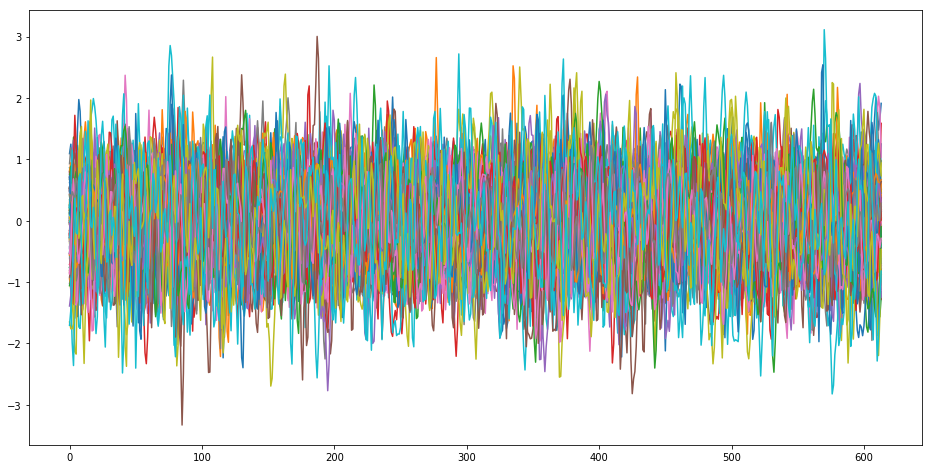

In [3]:
# Plot first 614 time points for first 100 observations
plt.figure(figsize=(16,8))
for i in range(100):
    plt.plot(range(614),xtrain[i,:614])
plt.show()

### Possible option: Using the projection on a low-dimensional space

In [4]:
# PCA transform
pca1 = PCA(n_components = 10, whiten = True)
pca1.fit(xtrain[:100,:])
xtrain_fpca = pca1.fit_transform(xtrain[:100,:])
# Fit the low-dimensional method
lof1 = LocalOutlierFactor(n_neighbors = 5 ,contamination = 'auto', novelty = True)
lof1.fit(xtrain_fpca)
# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest)
sscore = -lof1.score_samples(xtest_fpca)
print(sscore[:100])

[1.82511861 1.07928399 1.06818233 1.22811277 1.08966681 1.06654276
 1.11798009 1.08395005 1.12507495 1.93773484 1.20448971 1.12154439
 1.04115213 1.06937139 1.0367237  1.09385643 1.09987875 1.06782461
 1.07149112 1.09391162 1.09457638 1.08113532 1.06025999 1.09798487
 5.19351676 1.06529322 1.06068011 1.04764015 1.09646904 1.06001961
 1.18041795 1.12371479 1.0853956  1.08108158 1.20891784 1.21087533
 1.03938607 4.238103   0.99784165 1.28909723 1.09737816 1.09927118
 1.05735253 1.07051057 1.05575871 1.04407191 1.38682611 1.04276548
 1.40493233 1.32848615 1.05950624 1.07646842 1.08913798 1.19877925
 1.88642181 1.13497257 1.0717695  1.72966594 1.07723269 1.12337799
 1.34580893 1.13231925 1.07187988 1.06908153 0.99952697 1.09356005
 2.07481395 1.08994237 1.1530243  1.06410235 3.09225828 1.0677233
 1.18572752 1.11634924 2.37092517 1.10374983 1.04050871 1.10489226
 1.0252196  1.13346241 1.08027964 1.01089463 1.54685425 1.09857777
 1.16958357 1.07110342 1.06884453 1.07992979 1.09350435 1.04154

## Prepare a file for submission

In [5]:
# Save the anomaly scores to file
print(sscore.shape)
np.savetxt('ytest_challenge_student.csv', sscore, fmt = '%1.6f', delimiter=',')

(2511,)


#### Now it's your turn. Good luck !  :) 